In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pywt
%matplotlib inline

# Import data

In [17]:
data = pd.read_csv('SP-280-Leste.csv', sep=',',header=None)
data.head()

,0,1,2,3
0,1,01/09/2011 00:00,37,89.0
1,2,01/09/2011 00:05,48,82.0
2,3,01/09/2011 00:10,26,85.0
3,4,01/09/2011 00:15,47,81.0
4,5,01/09/2011 00:20,52,82.0


In [18]:
data = data.drop(columns=0)
data.head()

,1,2,3
0,01/09/2011 00:00,37,89.0
1,01/09/2011 00:05,48,82.0
2,01/09/2011 00:10,26,85.0
3,01/09/2011 00:15,47,81.0
4,01/09/2011 00:20,52,82.0


## Organize the dataset

In [19]:
# Rename columns
data = data.rename(columns={0:"ID", 1:"Data-Hora",2:"Fluxo[veic/h.faixa]", 3:"Velocidade[km/h]" })

# Calculate flow rate
data["Fluxo[veic/h.faixa]"] = data["Fluxo[veic/h.faixa]"] * 60 / 5 / 2

# Convert to_datetime
data['Data-Hora'] = pd.to_datetime(data['Data-Hora'], format='%d/%m/%Y %H:%M')

data.head()

,Data-Hora,Fluxo[veic/h.faixa],Velocidade[km/h]
0,2011-09-01 00:00:00,222.0,89.0
1,2011-09-01 00:05:00,288.0,82.0
2,2011-09-01 00:10:00,156.0,85.0
3,2011-09-01 00:15:00,282.0,81.0
4,2011-09-01 00:20:00,312.0,82.0


In [20]:
data.dtypes

Data-Hora              datetime64[ns]
Fluxo[veic/h.faixa]           float64
Velocidade[km/h]              float64
dtype: object

In [21]:
data.shape

(105408, 3)

## Understand DateTime

In [22]:
data['Data-Hora'].dt.year

0         2011
1         2011
2         2011
3         2011
4         2011
5         2011
6         2011
7         2011
8         2011
9         2011
10        2011
11        2011
12        2011
13        2011
14        2011
15        2011
16        2011
17        2011
18        2011
19        2011
20        2011
21        2011
22        2011
23        2011
24        2011
25        2011
26        2011
27        2011
28        2011
29        2011
          ... 
105378    2012
105379    2012
105380    2012
105381    2012
105382    2012
105383    2012
105384    2012
105385    2012
105386    2012
105387    2012
105388    2012
105389    2012
105390    2012
105391    2012
105392    2012
105393    2012
105394    2012
105395    2012
105396    2012
105397    2012
105398    2012
105399    2012
105400    2012
105401    2012
105402    2012
105403    2012
105404    2012
105405    2012
105406    2012
105407    2012
Name: Data-Hora, Length: 105408, dtype: int64

# Plotting data

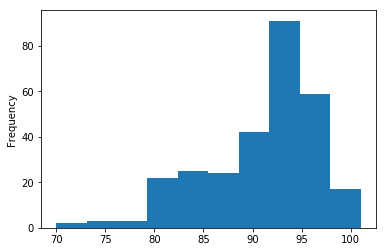

In [23]:
data.loc[data['Data-Hora']<'2011-09-02','Velocidade[km/h]'].plot(kind='hist')

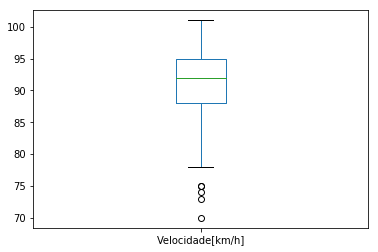

In [24]:
data.loc[data['Data-Hora']<'2011-09-02','Velocidade[km/h]'].plot(kind='box')

## Speed-Flow relationship

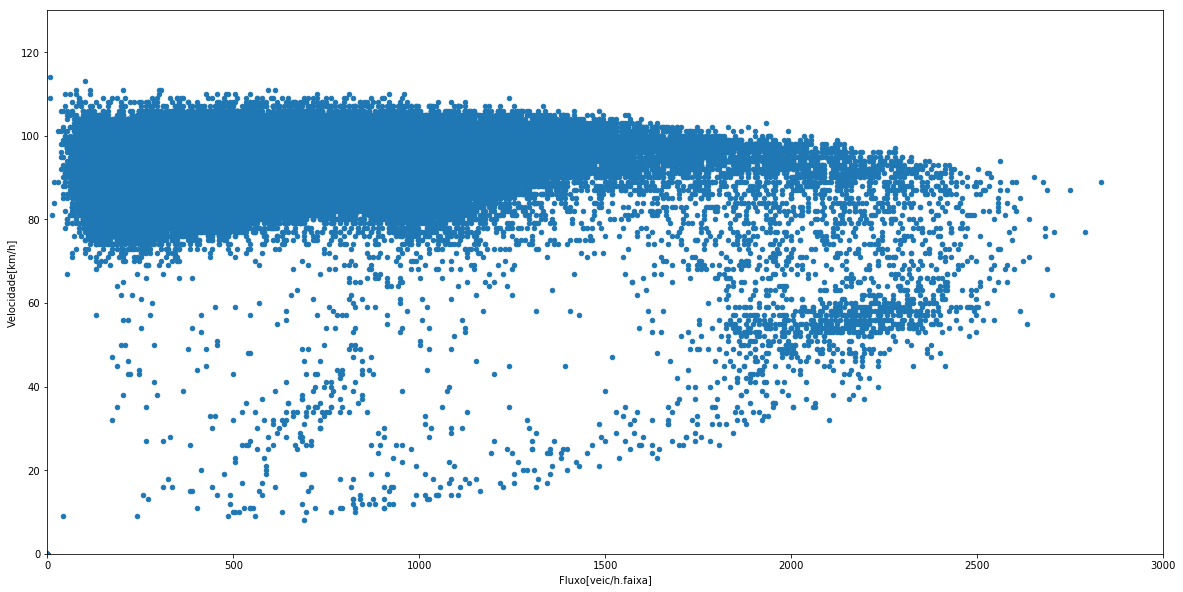

In [28]:
data.plot(x='Fluxo[veic/h.faixa]',
          y='Velocidade[km/h]',
          kind='scatter',
          figsize=(20,10),
         xlim=(0,3000),
         ylim=(0,130))

## Speed-Time and Flow-Time

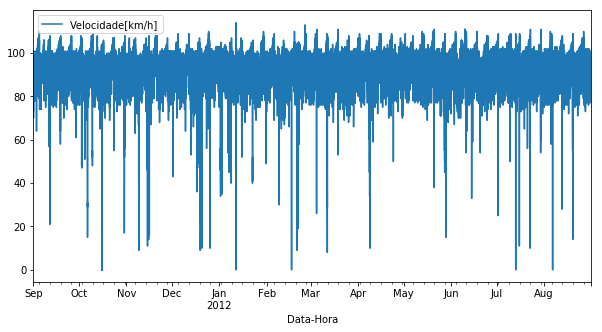

In [29]:
data.plot(x='Data-Hora',
          y='Velocidade[km/h]',
          kind='line',
          figsize=(10,5))

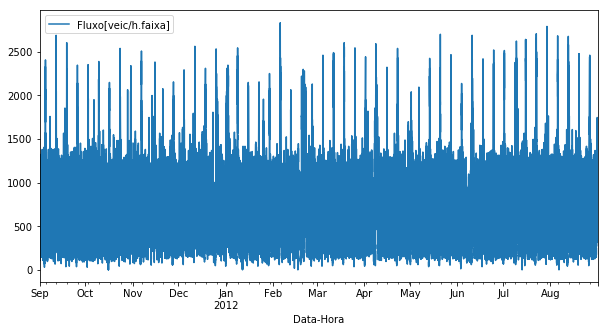

In [30]:
data.plot(x='Data-Hora',
          y='Fluxo[veic/h.faixa]',
          kind='line',
          figsize=(10,5))

# Wavelet Analysis

## Introduction

In [35]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [34]:
t = 5#min
n = 288#data.size

while n>2:
    print(t,' min -> ', n)
    t *= 2
    n /= 2

5  min ->  288
10  min ->  144.0
20  min ->  72.0
40  min ->  36.0
80  min ->  18.0
160  min ->  9.0
320  min ->  4.5
640  min ->  2.25


## Applying in all dataset

In [41]:
cA, cD = pywt.dwt(data['Velocidade[km/h]'],'haar')

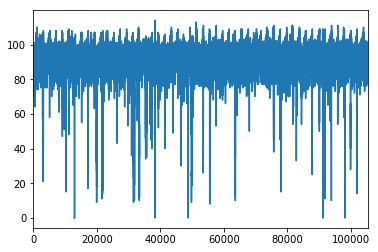

In [44]:
data['Velocidade[km/h]'].plot()

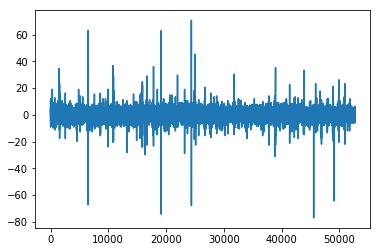

In [45]:
plt.plot(cD)

array([nan])

## Applying in each day

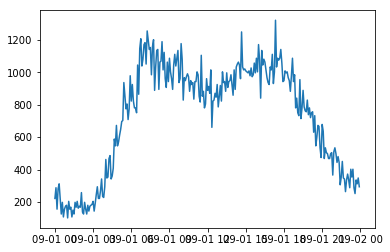

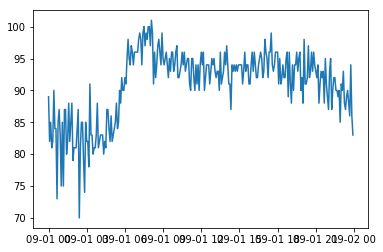

In [31]:
db = data[0:288]

# Plot Speed-Time and Flow-Time
fig = plt.figure()
plt.plot(db["Data-Hora"],db['Fluxo[veic/h.faixa]'])

fig = plt.figure()
plt.plot(db["Data-Hora"],db['Velocidade[km/h]'])

In [38]:
cA, cD = pywt.dwt(db['Taxa Fluxo [veic/h]'] ,'haar')
plt.plot(cA)
plt.figure()
plt.plot(cD,color='orange')

KeyError: 'Taxa Fluxo [veic/h]'

In [ ]:
cA, cD = pywt.dwt(db['Velocidade[km/h]'] ,'haar')
plt.plot(cA)
plt.figure()
plt.plot(cD,color='orange')